### Operacje kontekstowe - pochodne i gradienty

In [2]:
from skimage import data
import matplotlib.pyplot as plt

im = data.coins()

plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

<Figure size 500x500 with 1 Axes>

In [3]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

from skimage import img_as_float, img_as_ubyte

imf = img_as_float(im)
print(imf.shape, imf.dtype)

imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)

(303, 384) float64
(303, 384) uint8


#### Filtr (krzyż) Robertsa

Maska filtru inaczej jądro (ang. kernel):

$\begin{bmatrix} 0&0&0\\-1&0&0\\0&1&0\end{bmatrix}$

Maska filtru: 
 [[ 0  0  0]
 [ 1  0  0]
 [ 0 -1  0]]


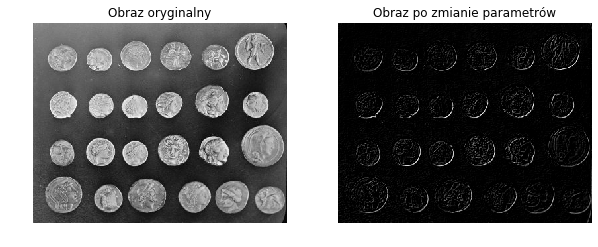

Maska filtru: 
 [[ 0  0  0]
 [ 0  0  1]
 [ 0 -1  0]]


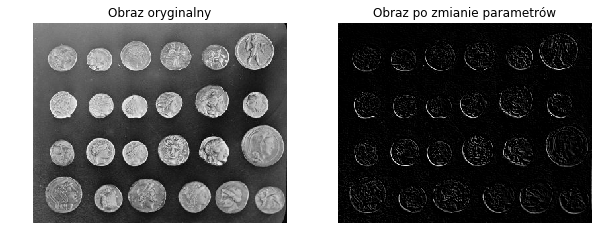

In [5]:
import cv2
import numpy as np

roberts = np.array([[0,0,0],[1,0,0],[0,-1,0]])
rimf1 = cv2.filter2D(imf,  ddepth=-1, kernel=roberts)

print('Maska filtru: \n', roberts)
show2imgs(imf, rimf1, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))


roberts = np.array([[0,0,0],[0,0,1],[0,-1,0]])
rimf2 = cv2.filter2D(imf,  ddepth=-1, kernel=roberts)

print('Maska filtru: \n', roberts)
show2imgs(imf, rimf2, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))


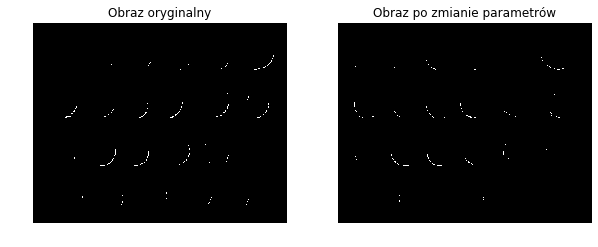

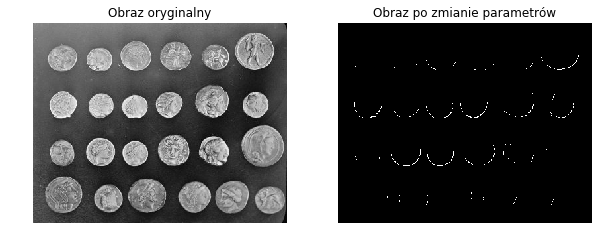

In [6]:
th = 127
th, bimf1 = cv2.threshold(rimf1, thresh=th, maxval=255, type=cv2.THRESH_BINARY)
th = 127
th, bimf2 = cv2.threshold(rimf2, thresh=th, maxval=255, type=cv2.THRESH_BINARY)

show2imgs(bimf1, bimf2, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

show2imgs(imf, bimf1+bimf2, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Operator Prewitta

Maska filtru inaczej jądro (ang. kernel):

$ 0^{\circ} = \begin{bmatrix} -1&0&1\\-1&0&1\\-1&0&1\end{bmatrix} \hspace{1cm}$
$ 45^{\circ} = \begin{bmatrix} 0&1&1\\-1&0&1\\-1&-1&0\end{bmatrix} \hspace{1cm}$
$ 90^{\circ} = \begin{bmatrix} 1&1&1\\0&0&0\\-1&-1&-1\end{bmatrix} \hspace{1cm}$
$ 135^{\circ} = \begin{bmatrix} 1&1&0\\1&0&-1\\0&-1&-1\end{bmatrix}$

Maska filtru: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


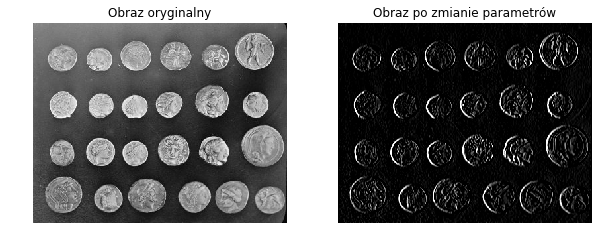

In [7]:
prewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
pimf = cv2.filter2D(imf,  ddepth=-1, kernel=prewitt)

print('Maska filtru: \n', prewitt)
show2imgs(imf, pimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))


#### Operator Sobela

Maska filtru inaczej jądro (ang. kernel):

$ 0^{\circ} = \begin{bmatrix} -1&0&1\\-2&0&2\\-1&0&1\end{bmatrix} \hspace{1cm}$
$ 45^{\circ} = \begin{bmatrix} 0&1&2\\-1&0&1\\-2&-1&0\end{bmatrix} \hspace{1cm}$
$ 90^{\circ} = \begin{bmatrix} 1&2&1\\0&0&0\\-1&-2&-1\end{bmatrix} \hspace{1cm}$
$ 135^{\circ} = \begin{bmatrix} 2&1&0\\1&0&-1\\0&-1&-2\end{bmatrix}$

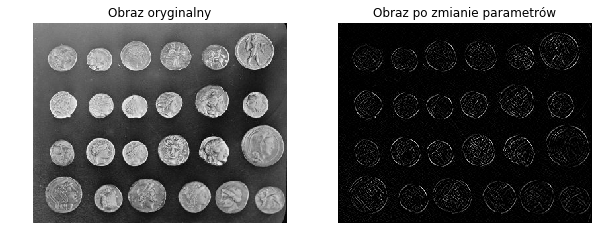

In [8]:
simf = cv2.Sobel(imf,  ddepth=-1, dx=1, dy=1, ksize=3)

show2imgs(imf, simf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Operator Scharra

Maska filtru inaczej jądro (ang. kernel):

$ 0^{\circ} = \begin{bmatrix} -3&0&3\\-10&0&10\\-3&0&3\end{bmatrix} \hspace{1cm}$
$ 45^{\circ} = \begin{bmatrix} 0&3&10\\-3&0&3\\-10&-3&0\end{bmatrix} \hspace{1cm}$
$ 90^{\circ} = \begin{bmatrix} 3&10&3\\0&0&0\\-3&-10&-3\end{bmatrix} \hspace{1cm}$
$ 135^{\circ} = \begin{bmatrix} 10&3&0\\3&0&-3\\0&-3&-10\end{bmatrix}$

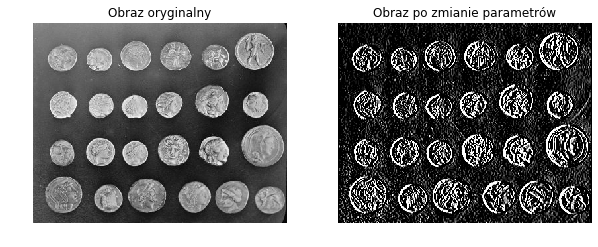

In [9]:
scimf = cv2.Scharr(imf, ddepth=-1, dx=1, dy=0)

show2imgs(imf, scimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

#### Laplasjany

Dyskretna implementacja operatora Laplace'a:

$\Large \nabla^2 = \frac{\partial^{2}f}{\partial{x^2}} + \frac{\partial^{2}f}{\partial{y^2}}$

Dla $ksize = 1$ maska filtru inaczej jądro (ang. kernel):

$ 0^{\circ} = \begin{bmatrix} 0&1&0\\1&-4&1\\0&1&0\end{bmatrix} \hspace{1cm}$

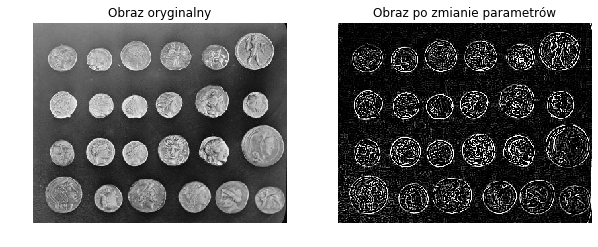

In [10]:
limf = cv2.Laplacian(imf, ddepth=-1, ksize=3)

show2imgs(imf, limf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

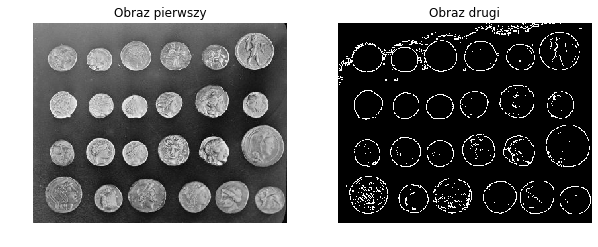

In [12]:
thr, binaryimg = cv2.threshold(imf, thresh=150, maxval=255, type=cv2.THRESH_OTSU)
show2imgs(imf, cv2.Laplacian(binaryimg, ddepth=-1, ksize=3), )